In [1]:
import pandas as pd
import numpy as np
import oddt
from oddt import toolkit
from oddt.scoring.descriptors import close_contacts_descriptor, oddt_vina_descriptor

In [3]:
core = pd.read_csv("/pubhome/xli02/Downloads/dataset/PDBbind/PDBbind_v2019/CASF_v16_index_dealt.csv", sep="\t")
core

,pdb_id,-logAffi
0,3ao4,2.07
1,3gv9,2.12
2,1uto,2.27
3,1ps3,2.28
4,4ddk,2.29
...,...,...
280,5dwr,11.22
281,4f2w,11.30
282,2x00,11.33
283,3o9i,11.82


In [4]:
core.shape

(285, 2)

In [5]:
core.iloc[0,]['pdb_id']

'3ao4'

In [6]:
features = pd.read_csv("/pubhome/xli02/project/PLIM/deep_learning/RFscore/scripts_from_zhuhui/test_core/core_12A_RFScore_features.csv")
features

,6.6,6.7,6.8,6.9,6.15,6.16,6.17,6.35,6.53,7.6,...,16.53_8-10,16.53_10-12,vina_gauss1,vina_gauss2,vina_repulsion,vina_hydrophobic,vina_hydrogen,vina_num_rotors,pdb_id,-logAffi
0,2143.0,577.0,570.0,0.0,466.0,125.0,135.0,0.0,435.0,114.0,...,0.0,0.0,89.413338,1012.445923,3.515519,22.675829,2.582556,1.0,3ao4,2.07
1,1094.0,359.0,386.0,0.0,160.0,52.0,59.0,0.0,551.0,163.0,...,0.0,0.0,42.500523,665.454651,3.699299,8.649817,1.566987,3.0,3gv9,2.12
2,1286.0,365.0,439.0,38.0,191.0,54.0,63.0,4.0,0.0,0.0,...,0.0,0.0,36.334339,568.007385,2.532124,4.822641,2.605420,2.0,1uto,2.27
3,1629.0,424.0,463.0,8.0,392.0,101.0,110.0,2.0,1211.0,307.0,...,0.0,0.0,87.529808,1003.525940,9.235392,0.000000,11.397213,1.0,1ps3,2.28
4,1449.0,454.0,423.0,9.0,0.0,0.0,0.0,0.0,731.0,216.0,...,0.0,0.0,62.257332,845.647339,0.912782,15.093544,0.509013,1.0,4ddk,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,4301.0,1069.0,1241.0,0.0,752.0,188.0,218.0,0.0,217.0,53.0,...,0.0,0.0,92.461945,1721.970703,3.735585,72.053085,2.000000,5.0,5dwr,11.22
281,2813.0,747.0,853.0,26.0,1109.0,285.0,323.0,10.0,202.0,51.0,...,0.0,0.0,118.319153,1375.721313,3.114269,8.066344,4.417650,4.0,4f2w,11.30
282,5424.0,1355.0,1725.0,89.0,197.0,48.0,57.0,3.0,595.0,148.0,...,0.0,0.0,92.534737,1735.956543,1.925060,91.395836,0.000000,1.0,2x00,11.33
283,5353.0,1488.0,1587.0,3.0,562.0,160.0,164.0,0.0,1301.0,356.0,...,0.0,0.0,144.244247,2239.065918,4.929898,53.110027,5.489359,12.0,3o9i,11.82


In [9]:
vina_title =['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']

In [11]:
rf_v1_title = features.columns.tolist()[:36]
feature_list = vina_title + rf_v1_title
feature_list

['vina_gauss1',
 'vina_gauss2',
 'vina_repulsion',
 'vina_hydrophobic',
 'vina_hydrogen',
 'vina_num_rotors',
 '6.6',
 '6.7',
 '6.8',
 '6.9',
 '6.15',
 '6.16',
 '6.17',
 '6.35',
 '6.53',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.15',
 '7.16',
 '7.17',
 '7.35',
 '7.53',
 '8.6',
 '8.7',
 '8.8',
 '8.9',
 '8.15',
 '8.16',
 '8.17',
 '8.35',
 '8.53',
 '16.6',
 '16.7',
 '16.8',
 '16.9',
 '16.15',
 '16.16',
 '16.17',
 '16.35',
 '16.53']

In [13]:
train_code = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/PDBbind/pdbbind_v2019/minimized/dataset/PDBbind_minimized/complex_6A/train.csv', sep='\t')
valid_code = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/PDBbind/pdbbind_v2019/minimized/dataset/PDBbind_minimized/complex_6A/valid.csv', sep='\t')
test_code = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/PDBbind/pdbbind_v2019/minimized/dataset/PDBbind_minimized/complex_6A/test.csv', sep='\t')

In [ ]:
train_code = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/PDBbind/pdbbind_v2019/minimized/dataset/PDBbind_minimized/complex_6A/train.csv', sep='\t')

In [ ]:
train_set = pd.merge(train_code, features, on=['pdb','affinity'])

In [15]:
np.array([0, 2, 4, 6, 8, 10, 12])

array([ 0,  2,  4,  6,  8, 10, 12])

In [16]:
np.arange(0,12+1,2)

array([ 0,  2,  4,  6,  8, 10, 12])

In [17]:
np.arange(0,6+1,2)

array([0, 2, 4, 6])

In [55]:
ligand_types = [6, 7, 8, 9, 15, 16, 17, 35, 53]
protein_types = [6, 7, 8, 16]

In [56]:
[(mol_type, prot_type)
                         for mol_type in ligand_types
                         for prot_type in protein_types]

[(6, 6),
 (6, 7),
 (6, 8),
 (6, 16),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 16),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 16),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 16),
 (15, 6),
 (15, 7),
 (15, 8),
 (15, 16),
 (16, 6),
 (16, 7),
 (16, 8),
 (16, 16),
 (17, 6),
 (17, 7),
 (17, 8),
 (17, 16),
 (35, 6),
 (35, 7),
 (35, 8),
 (35, 16),
 (53, 6),
 (53, 7),
 (53, 8),
 (53, 16)]

In [2]:
PDBbind = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/test_on_core_set/1-remove_same_id_in_core_set/PDBbind_minimized/PDBbind_minimized_rm_core_ids.csv', sep='\t')
PDBbind

,pdb_id,-logAffi
0,3zzf,0.40
1,3gww,0.45
2,1w8l,0.49
3,3fqa,0.49
4,1zsb,0.60
...,...,...
16889,7cpa,13.96
16890,2xuf,14.39
16891,1avd,15.00
16892,2xui,15.00


In [27]:
PDBbind.iloc[0,]['-logAffi']

0.4

In [3]:
structure_dir = '/pubhome/xli02/project/PLIM/v2019_dataset/PDBbind_v2019'
cutoff=6

In [4]:
pdb = PDBbind.iloc[0,]['pdb_id']
protein = next(oddt.toolkits.ob.readfile('pdb', f'{structure_dir}/{pdb}/rec_h_opt.pdb'))
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
ligand_atomic_nums = [6, 7, 8, 9, 15, 16, 17, 35, 53]
protein_atomic_nums = [6, 7, 8, 16]
# cutoff = 12
rfscore_descriptor_cc = close_contacts_descriptor(
    cutoff=cutoff,
    protein_types=protein_atomic_nums,
    ligand_types=ligand_atomic_nums)

In [28]:
protein

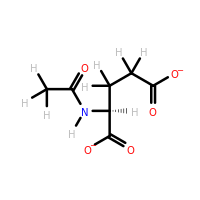

In [5]:
ligand

In [6]:
feature = rfscore_descriptor_cc.build(ligand, protein)

In [27]:
feature

array([[151,  52,  40,   0,  18,   7,   6,   0,  94,  36,  24,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [48]:
pdb = PDBbind.iloc[0,]['pdb_id']
protein = next(oddt.toolkits.ob.readfile('pdb', f'{structure_dir}/{pdb}/rec_h_opt.pdb'))
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
ligand_atomic_nums = [6, 7, 8, 9, 15, 16, 17, 35, 53]
protein_atomic_nums = [6, 7, 8, 16]
# cutoff = 12
rfscore_descriptor_cc = close_contacts_descriptor(
    cutoff=cutoff,
    protein_types=protein_atomic_nums,
    ligand_types=ligand_atomic_nums)
feature = rfscore_descriptor_cc.build(ligand, protein)
feature

array([[151,  52,  40,   0,  18,   7,   6,   0,  94,  36,  24,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [50]:
pdb = PDBbind.iloc[0,]['pdb_id']
# protein = next(oddt.toolkits.ob.readfile('pdb', f'{structure_dir}/{pdb}/rec_h_opt.pdb'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/{pdb}/rec_addcharge_pocket_6.mol2'))
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
ligand_atomic_nums = [6, 7, 8, 9, 15, 16, 17, 35, 53]
protein_atomic_nums = [6, 7, 8, 16]
# cutoff = 12
rfscore_descriptor_cc = close_contacts_descriptor(
    cutoff=cutoff,
    protein_types=protein_atomic_nums,
    ligand_types=ligand_atomic_nums)
feature = rfscore_descriptor_cc.build(ligand, protein)
feature

array([[151,  52,  40,   0,  18,   7,   6,   0,  94,  36,  24,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [34]:
pdb = PDBbind.iloc[0,]['pdb_id']
protein = next(oddt.toolkits.ob.readfile('pdb', f'{structure_dir}/3mvl/rec_h_opt.pdb'))
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
ligand_atomic_nums = [6, 7, 8, 9, 15, 16, 17, 35, 53]
protein_atomic_nums = [6, 7, 8, 16]
# cutoff = 12
rfscore_descriptor_cc = close_contacts_descriptor(
    cutoff=cutoff,
    protein_types=protein_atomic_nums,
    ligand_types=ligand_atomic_nums)
feature = rfscore_descriptor_cc.build(ligand, protein)
feature

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [32]:
pdb = PDBbind.iloc[0,]['pdb_id']
# protein = next(oddt.toolkits.ob.readfile('pdb', f'{structure_dir}/{pdb}/rec_h_opt.pdb'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/3mvl/rec_addcharge_pocket_6.mol2'))
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
ligand_atomic_nums = [6, 7, 8, 9, 15, 16, 17, 35, 53]
protein_atomic_nums = [6, 7, 8, 16]
# cutoff = 12
rfscore_descriptor_cc = close_contacts_descriptor(
    cutoff=cutoff,
    protein_types=protein_atomic_nums,
    ligand_types=ligand_atomic_nums)
feature = rfscore_descriptor_cc.build(ligand, protein)
feature

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [51]:
# pdb = PDBbind.iloc[0,]['pdb_id']
protein = next(oddt.toolkits.ob.readfile('pdb', f'{structure_dir}/3mvl/rec_h_opt.pdb'))
# ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
# ligand_atomic_nums = [6, 7, 8, 9, 15, 16, 17, 35, 53]
# protein_atomic_nums = [6, 7, 8, 16]
# # cutoff = 12
# rfscore_descriptor_cc = close_contacts_descriptor(
#     cutoff=cutoff,
#     protein_types=protein_atomic_nums,
#     ligand_types=ligand_atomic_nums)
feature = rfscore_descriptor_cc.build(ligand, protein)
feature

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [36]:
pdb = PDBbind.iloc[0,]['pdb_id']
# protein = next(oddt.toolkits.ob.readfile('pdb', f'{structure_dir}/{pdb}/rec_h_opt.pdb'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/2fvd/rec_addcharge_pocket_6.mol2'))
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
ligand_atomic_nums = [6, 7, 8, 9, 15, 16, 17, 35, 53]
protein_atomic_nums = [6, 7, 8, 16]
# cutoff = 12
rfscore_descriptor_cc = close_contacts_descriptor(
    cutoff=cutoff,
    protein_types=protein_atomic_nums,
    ligand_types=ligand_atomic_nums)
feature = rfscore_descriptor_cc.build(ligand, protein)
feature

array([[135,  42,  24,   0,  21,   6,   3,   0,  81,  26,  15,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [37]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('pdb', f'{structure_dir}/{pdb}/rec_h_opt.pdb'))
cutoff_list = np.arange(0,cutoff+1,2)
descriptors = close_contacts_descriptor(
    cutoff=cutoff_list,
    protein_types=protein_atomic_nums,
    ligand_types=ligand_atomic_nums)
feature = descriptors.build(ligand, protein)
feature

array([[  0,  12, 139,   0,  13,  39,   0,   5,  35,   0,   0,   0,   0,
          3,  15,   0,   2,   5,   0,   2,   4,   0,   0,   0,   0,  20,
         74,   0,   9,  27,   0,   2,  22,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]])

In [52]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/{pdb}/rec_addcharge_pocket_6.mol2'))
cutoff_list = np.arange(0,cutoff+1,2)
descriptors = close_contacts_descriptor(
    cutoff=cutoff_list,
    protein_types=protein_atomic_nums,
    ligand_types=ligand_atomic_nums)
feature = descriptors.build(ligand, protein)
feature

array([[  0,  12, 139,   0,  13,  39,   0,   5,  35,   0,   0,   0,   0,
          3,  15,   0,   2,   5,   0,   2,   4,   0,   0,   0,   0,  20,
         74,   0,   9,  27,   0,   2,  22,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]])

In [53]:
# ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/3mvl/rec_addcharge_pocket_6.mol2'))
# cutoff_list = np.arange(0,cutoff+1,2)
# descriptors = close_contacts_descriptor(
#     cutoff=cutoff_list,
#     protein_types=protein_atomic_nums,
#     ligand_types=ligand_atomic_nums)
feature = descriptors.build(ligand, protein)
feature

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [39]:
igand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/3mvl/rec_addcharge_pocket_6.mol2'))
cutoff_list = np.arange(0,cutoff+1,2)
descriptors = close_contacts_descriptor(
    cutoff=cutoff_list,
    protein_types=protein_atomic_nums,
    ligand_types=ligand_atomic_nums)
feature = descriptors.build(ligand, protein)
feature

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [11]:
# vina_scores = ['vina_gauss1',
#             'vina_gauss2',
#             'vina_repulsion',
#             'vina_hydrophobic',
#             'vina_hydrogen',
#             'vina_num_rotors']
# vina = oddt_vina_descriptor(vina_scores=vina_scores)

In [40]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('pdb', f'{structure_dir}/{pdb}/rec_h_opt.pdb'))
vina_scores = ['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
vina = oddt_vina_descriptor(vina_scores=vina_scores)
feature = vina.build(ligand, protein)
feature

array([[ 72.49007  , 834.49866  ,   4.8661804,  13.132306 ,   3.6445377,
          5.       ]], dtype=float32)

In [60]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/{pdb}/rec_addcharge_pocket_6.mol2'))
vina_scores = ['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
vina = oddt_vina_descriptor(vina_scores=vina_scores)
feature = vina.build(ligand, protein)
feature

array([[ 72.49007  , 802.2137   ,   4.8661804,  13.132306 ,   3.6445377,
          5.       ]], dtype=float32)

In [61]:

protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/3mvl/rec_addcharge_pocket_6.mol2'))
vina_scores = ['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
vina = oddt_vina_descriptor(vina_scores=vina_scores)
feature = vina.build(ligand, protein)
feature

array([[ 72.49007  , 802.2137   ,   4.8661804,  13.132306 ,   3.6445377,
          5.       ]], dtype=float32)

In [71]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/3mvl/rec_addcharge_pocket_6.mol2'))
vina_scores = ['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
vina = oddt_vina_descriptor(vina_scores=vina_scores)
feature = vina.build(ligand, protein)
feature

array([[0., 0., 0., 0., 0., 5.]], dtype=float32)

In [72]:
len(vina.protein.atoms)

667

In [73]:

protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/{pdb}/rec_addcharge_pocket_6.mol2'))
vina_scores = ['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
vina = oddt_vina_descriptor(vina_scores=vina_scores)
feature = vina.build(ligand, protein)
feature

array([[0., 0., 0., 0., 0., 5.]], dtype=float32)

In [74]:
len(vina.protein.atoms)

486

In [75]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/{pdb}/rec_addcharge_pocket_6.mol2'))
vina_scores = ['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
vina = oddt_vina_descriptor(vina_scores=vina_scores)
feature = vina.build(ligand, protein)
feature

array([[ 72.49007  , 802.2137   ,   4.8661804,  13.132306 ,   3.6445377,
          5.       ]], dtype=float32)

In [76]:
len(vina.protein.atoms)

486

In [42]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/2fvd/rec_addcharge_pocket_6.mol2'))
vina_scores = ['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
vina2 = oddt_vina_descriptor(vina_scores=vina_scores)
feature2 = vina2.build(ligand, protein)
feature2

array([[ 69.42018 , 327.95474 , 204.4785  ,  20.941042,   4.522452,
          5.      ]], dtype=float32)

In [46]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/{pdb}/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/3mvl/rec_addcharge_pocket_6.mol2'))
vina_scores = ['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
vina = oddt_vina_descriptor(vina_scores=vina_scores)
feature = vina.build(ligand, None)
feature

AttributeError: 'vina_docking' object has no attribute 'rec_dict'

In [18]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/2fvd/cry_lig_opt_converted.sdf'))
# protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/3mvl/rec_addcharge_pocket_6.mol2'))
feature = vina.build(ligand, None)
feature

array([[0., 0., 0., 0., 0., 6.]], dtype=float32)

In [19]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/2fvd/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/2fvd/rec_addcharge_pocket_6.mol2'))
feature = vina.build(ligand, protein)
feature

array([[ 103.4193   , 1529.4481   ,    3.25121  ,   29.440277 ,
           3.1925864,    6.       ]], dtype=float32)

In [20]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/2fvd/cry_lig_opt_converted.sdf'))
# protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/3mvl/rec_addcharge_pocket_6.mol2'))
feature = vina.build(ligand, None)
feature

array([[ 103.4193   , 1529.4481   ,    3.25121  ,   29.440277 ,
           3.1925864,    6.       ]], dtype=float32)

In [21]:
ligand = next(oddt.toolkits.ob.readfile('sdf', f'{structure_dir}/3mvl/cry_lig_opt_converted.sdf'))
protein = next(oddt.toolkits.ob.readfile('mol2', f'{structure_dir}/2fvd/rec_addcharge_pocket_6.mol2'))
feature = vina.build(ligand, protein)
feature

array([[0., 0., 0., 0., 0., 9.]], dtype=float32)

In [18]:
Uw = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/test_on_core_set/1-remove_same_id_in_core_set/PLANet_Uw/PLANet_Uw_remove_core_set_ids.csv', sep='\t')
Uw

,unique_identify,-logAffi
0,CHEMBL1075026_1swr_CHEMBL857,14.000000
1,CHEMBL1075027_1hp5_CHEMBL257158,4.698970
2,CHEMBL1075027_1hp5_CHEMBL403756,4.000000
3,CHEMBL1075027_1hp5_CHEMBL404356,3.698970
4,CHEMBL1075027_1jak_CHEMBL253537,4.677781
...,...,...
69751,CHEMBL6166_4zk5_CHEMBL3623138,8.431798
69752,CHEMBL6166_4zk5_CHEMBL3623139,8.795880
69753,CHEMBL6166_5di1_CHEMBL3754283,7.588909
69754,CHEMBL6166_5di1_CHEMBL3754304,6.285285
